# Дипломная работа по курсу python

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузите файл HR.csv в pandas dataframe

In [147]:
df = pd.read_csv('HR.csv') 
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [149]:
# Признаки:
dict={
    'satisfaction_level' : 'Уровень удовлетворенности работой',
    'last_evaluation' : 'Время с момента последней оценки в годах',
    'number_project' : 'Количество проектов, выполненных за время работы',
    'average_montly_hours' : 'Среднее количество часов на рабочем месте в месяц',
    'time_spend_company' : 'Стаж работы в компании в годах',
    'Work_accident' : 'Происходили ли несчастные случаи на рабочем месте с сотрудником',
    'left' : 'уволился ли сотрудник',
    'promotion_last_5years' : 'повышался ли сотрудник за последние пять лет',
    'department' : 'отдел в котором работает сотрудник',
    'salary' : 'относительный уровень зарплаты' 
    }

### 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [150]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### 3. Рассчитайть и визуализировать корреляционную матрицу для количественных переменных
### Определить две самые скоррелированные и две наименее скоррелированные переменные

In [151]:
# для выбора метода расчета корреляции изучим данные:

In [152]:
# посмотрим выбросы по датафрейму
# так как есть столбцы 'department' и 'salary' символьные поставим try/except
for column in df.columns:
    df_short=df[[column]]
    try:
        q1 = df_short[column].quantile(0.25)
        q3 = df_short[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr) 
        upper_bound = q3 + (1.5 * iqr)
        print(f'выбросами по столбцу {column} признано {len(df) - len(df_short[df_short[column].between(lower_bound, upper_bound, inclusive=True)])} записей')    
    except:
        pass

выбросами по столбцу satisfaction_level признано 0 записей
выбросами по столбцу last_evaluation признано 0 записей
выбросами по столбцу number_project признано 0 записей
выбросами по столбцу average_montly_hours признано 0 записей
выбросами по столбцу time_spend_company признано 1282 записей
выбросами по столбцу Work_accident признано 2169 записей
выбросами по столбцу left признано 3571 записей
выбросами по столбцу promotion_last_5years признано 319 записей


In [153]:
# 8,5% записей с "стаж работы в компании в годах" признано выбросами
# остальные категорийные по сути

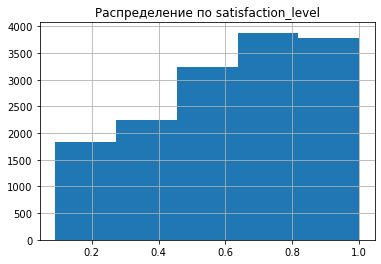

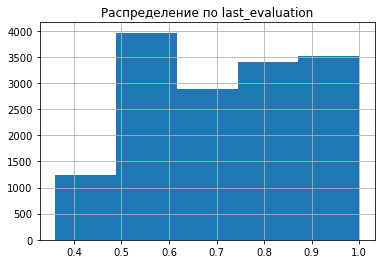

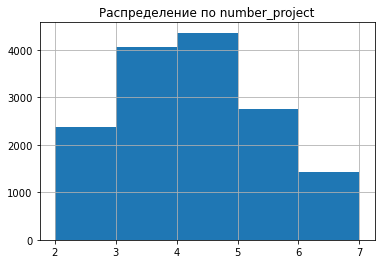

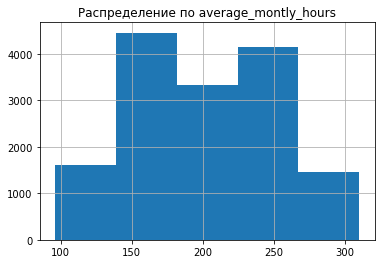

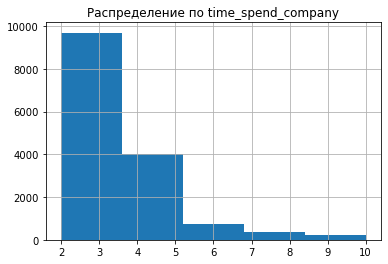

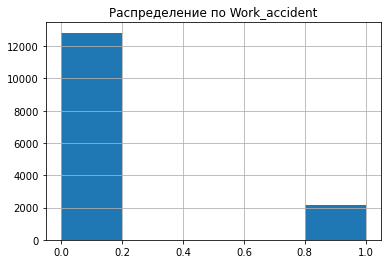

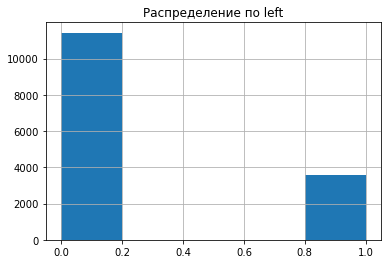

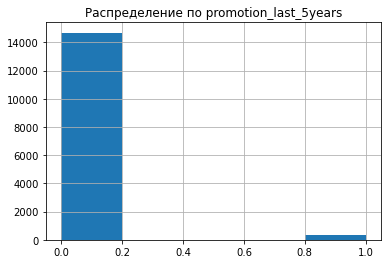

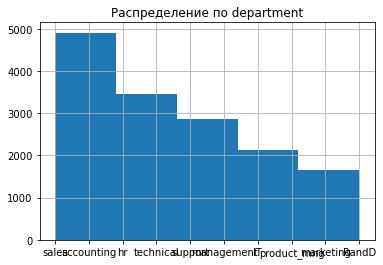

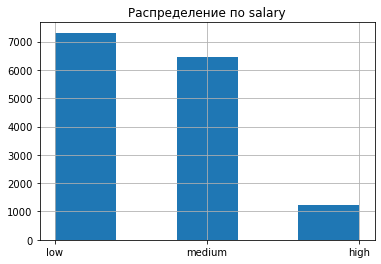

In [154]:
# посмотрим рапределение по столбцам
for column in df.columns:
    df[column].hist(bins=5)
    plt.title(f'Распределение по {column}')
    plt.show()

In [155]:
# Так как часть стоблцов имеет категориальную "природу" плюс большинство стобцов не является
# нормально распределёнными необходимо выбирать ранговую корреляцию Спирмана или τ-Кендалла.
# считается, что применение коэффициента Кендалла предпочтительно, если в исходных данных имеются выбросы.
# будем считать по Кендалу (просто так решил :) )

In [156]:
# корреляционная матрица по Кендалу
corr = df.corr(method='kendall')

In [157]:
# 1й вариант визуализации:
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.0000,0.1139,0.0221,0.0511,-0.1100,0.0463,-0.3007,0.0183
last_evaluation,0.1139,1.0000,0.2663,0.2354,0.1188,-0.0047,-0.0020,-0.0059
number_project,0.0221,0.2663,1.0000,0.3070,0.1950,0.0021,-0.0176,-0.0027
average_montly_hours,0.0511,0.2354,0.3070,1.0000,0.1195,-0.0050,0.0380,-0.0024
time_spend_company,-0.1100,0.1188,0.1950,0.1195,1.0000,-0.0248,0.2449,0.0321
Work_accident,0.0463,-0.0047,0.0021,-0.0050,-0.0248,1.0000,-0.1546,0.0392
left,-0.3007,-0.0020,-0.0176,0.0380,0.2449,-0.1546,1.0000,-0.0618
promotion_last_5years,0.0183,-0.0059,-0.0027,-0.0024,0.0321,0.0392,-0.0618,1.0000


<AxesSubplot:>

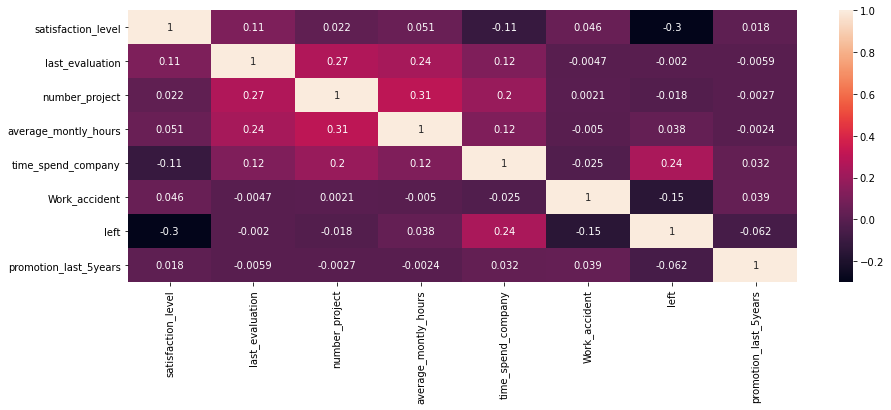

In [158]:
# 2й вариант визуализации:
plt.figure(figsize=(15, 5))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot = True, fmt='.2g')

In [162]:
# стоит задача найти самые две скоррелированные и две наименее скореллированные переменные.
# корреляция бывает положительной и отрицательной (но при этом сильной).
# возможно "костыльный" способ, но ничего лучше не пришло на ум:
# вычисляем самые скорреллированные и менее скорреллированные пары через максимальные и минимальные абсолютные значения
max_value=0
min_value=1
for i in list(corr.index):
    for y in list(corr.index):
        z = corr.loc[i,y]
        if z != 1 and max_value < abs(z):
            max_value = abs(z)
            max_variable_1=i
            max_variable_2=y
        elif z != 1 and min_value > abs(z):
            min_value = abs(z)
            min_variable_1=i
            min_variable_2=y
        else:
            pass
print(f'самая минимальная корреляция между {dict[min_variable_1]} и {dict[min_variable_2]}: {round(min_value,4)}')
print(f'самая большая корреляция между {dict[max_variable_1]} и {dict[max_variable_2]}: {round(max_value,4)}')
# можно было еще преобразовать датафрейм через corr=corr.abs() и перебирать уже готовые значения

самая минимальная корреляция между Время с момента последней оценки в годах и уволился ли сотрудник: 0.002
самая большая корреляция между Количество проектов, выполненных за время работы и Среднее количество часов на рабочем месте в месяц: 0.307


In [163]:
# вывод: чем больше работаешь тем больше сделаешь :)

### 4. Рассчитайте сколько сотрудников работает в каждом департаменте 

In [164]:
# ключевое слово "работает" - т.е. left = false (0)
df.loc[df.left==0].groupby('department').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
department,,,,,,,,,
IT,954,954,954,954,954,954,954,954,954
RandD,666,666,666,666,666,666,666,666,666
accounting,563,563,563,563,563,563,563,563,563
hr,524,524,524,524,524,524,524,524,524
management,539,539,539,539,539,539,539,539,539
marketing,655,655,655,655,655,655,655,655,655
product_mng,704,704,704,704,704,704,704,704,704
sales,3126,3126,3126,3126,3126,3126,3126,3126,3126
support,1674,1674,1674,1674,1674,1674,1674,1674,1674


In [165]:
# вариант без лишней информации
dep = set(df.department)
print('На текущий момент в департаменте:')
for i in dep:
    print(f'- {i} работает {len(df.loc[df.department == i].loc[df.left == 0])} человек')
#    print(f'  - уволилось {len(df.loc[df.department == i].loc[df.left == 1])} человек') # можно посмотреть сколько уволилось

На текущий момент в департаменте:
- support работает 1674 человек
- marketing работает 655 человек
- technical работает 2023 человек
- management работает 539 человек
- accounting работает 563 человек
- sales работает 3126 человек
- hr работает 524 человек
- IT работает 954 человек
- RandD работает 666 человек
- product_mng работает 704 человек


### 5. Показать распределение сотрудников по зарплатам

<AxesSubplot:>

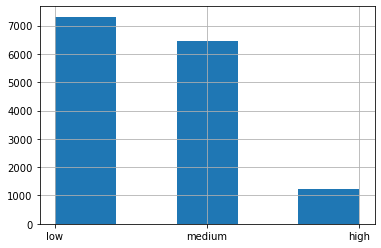

In [167]:
# так как не указано действующих или нет - считаем по всем, включая уволившихся
df.salary.hist(bins=5)

### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

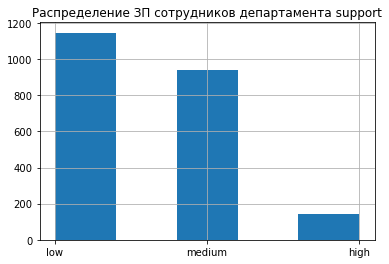

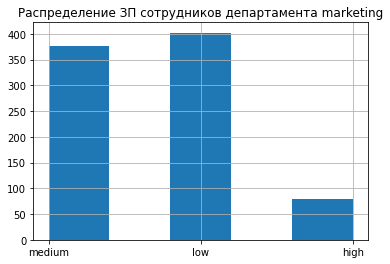

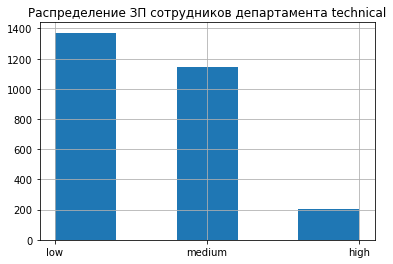

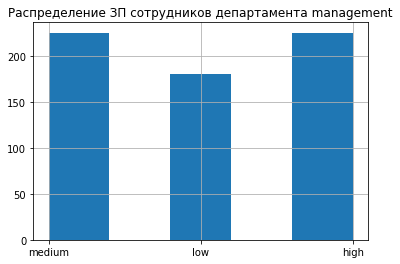

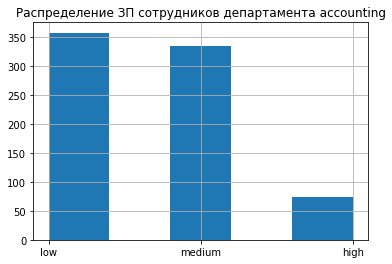

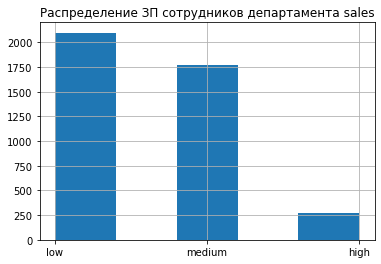

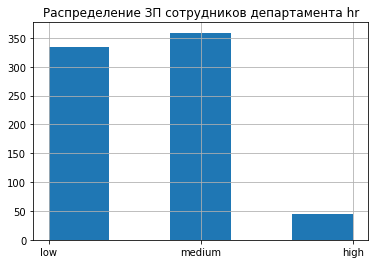

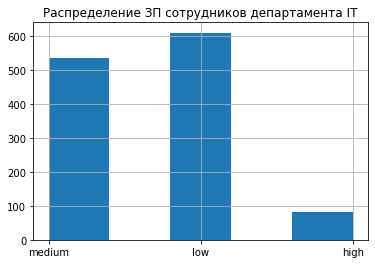

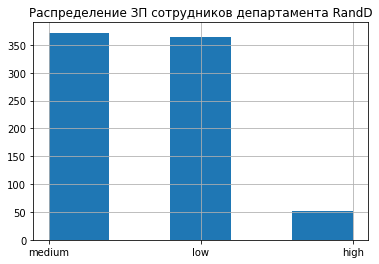

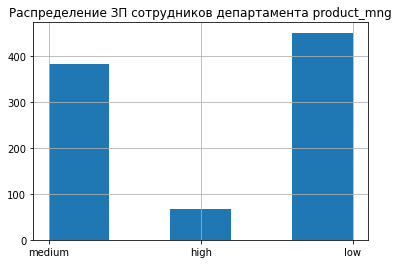

In [168]:
dep = set(df.department)
for i in dep:
    df.loc[df.department == i].salary.hist(bins=5)
    plt.title(f'Распределение ЗП сотрудников департамента {i}')
    plt.show()

### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [169]:
# делаем копию данных
df_gip = df[['salary', 'average_montly_hours']].copy()

In [170]:
df_gip

,salary,average_montly_hours
0,low,157
1,medium,262
2,medium,272
3,low,223
4,low,159
...,...,...
14994,low,151
14995,low,160
14996,low,143
14997,low,280


In [171]:
# переведем уровень ЗП в категории 
dct = {
'low':1,
'medium':2,
'high':3   
}
df_gip.salary = df_gip.salary.apply(lambda x: dct[x])
df_gip

,salary,average_montly_hours
0,1,157
1,2,262
2,2,272
3,1,223
4,1,159
...,...,...
14994,1,151
14995,1,160
14996,1,143
14997,1,280


In [172]:
# считаем коэф. корреляции Кендала (у нас категорийный признак)
df_gip[['salary', 'average_montly_hours']].corr(method='kendall')

,salary,average_montly_hours
salary,1.000000,0.001896
average_montly_hours,0.001896,1.000000


In [173]:
# считаем коэф. корреляции Спирмена (у нас категорийный признак)
df_gip[['salary', 'average_montly_hours']].corr(method='spearman')

,salary,average_montly_hours
salary,1.000000,0.002452
average_montly_hours,0.002452,1.000000


In [174]:
# вывод - корреляция на уровне 0.2% это отсутствие зависимости

### 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности)
>Доля сотрудников с повышением за последние 5 лет \
Средняя степень удовлетворенности \
Среднее количество проектов 

In [175]:
dict_status = {
    0: 'РАБОТАЮЩИЕ',
    1: 'УВОЛИВШИЕСЯ'
    }
dict_param = {
    'satisfaction_level':'Степень удовлетворенности',
    'number_project':'Количество проектов'
    }
for i in dict_status:
    print()
    print(dict_status[i], ":", len(df.loc[df.left == i]), "человек,", round(len(df.loc[df.left == i])/len(df)*100,3),"%")
    print("Доля сотрудников с повышением за последние 5 лет :", round(len(df.loc[df.left == i].loc[df.promotion_last_5years == 1])/len(df.loc[df.left == i]*100),3),"%")
    for y in dict_param:
        print(dict_param[y], ":", "средняя", round(df.loc[df.left == i][y].mean(),3),",", "медиана", round(df.loc[df.left == i][y].median(),3))


РАБОТАЮЩИЕ : 11428 человек, 76.192 %
Доля сотрудников с повышением за последние 5 лет : 0.026 %
Степень удовлетворенности : средняя 0.667 , медиана 0.69
Количество проектов : средняя 3.787 , медиана 4.0

УВОЛИВШИЕСЯ : 3571 человек, 23.808 %
Доля сотрудников с повышением за последние 5 лет : 0.005 %
Степень удовлетворенности : средняя 0.44 , медиана 0.41
Количество проектов : средняя 3.856 , медиана 4.0


### 9. Разделить данные на тестовую и обучающую выборки - 20 баллов
>Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) \
Оценить качество модели на тестовой выборки 

In [176]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [177]:
# посчитаем 2 варианта:
# 1. по всем столбцам
# 2. по основным, с которыми у 'left' больше всего корреляций
two_var_list=[
        ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years'],
        ['satisfaction_level','time_spend_company','Work_accident']
]
for i in two_var_list:
    X = df[i]
    y = df['left']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    lda = LinearDiscriminantAnalysis()
    # обучаем данные
    lda.fit(X_train, y_train)
    # делаем прогноз на тестовой выборке
    lda.predict(X_test)
    # смотрим разницу факта и прогноза
    result = pd.DataFrame([y_test, lda.predict(X_test)]).T
    # точность модели
    print(f'Точность модели по {len(i)} параметрам: {round(accuracy_score(y_test, lda.predict(X_test)),4)}')

Точность модели по 7 параметрам: 0.7558
Точность модели по 3 параметрам: 0.7529


In [178]:
# разберем каждый из 3х параметров по отдельности:

In [179]:
list_of_params = [
                'Work_accident',
                'time_spend_company',
                'satisfaction_level'
                ]
for i in list_of_params:
    X = df[[i]]
    y = df['left']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    lda = LinearDiscriminantAnalysis()
    # обучаем данные
    lda.fit(X_train, y_train)
    # делаем прогноз на тестовой выборке
    lda.predict(X_test)
    # смотрим разницу факта и прогноза
    result = pd.DataFrame([y_test, lda.predict(X_test)]).T
    # точность модели
    print(f'Точность модели по параметру {i}: {round(accuracy_score(y_test, lda.predict(X_test)),4)}')

Точность модели по параметру Work_accident: 0.7618
Точность модели по параметру time_spend_company: 0.7478
Точность модели по параметру satisfaction_level: 0.7531


In [180]:
# несмотря на "хорошую" точность модели, очевидно, что ей не достаточно "разносторонних" данных для расчетов 
# слишком большой "перекос" в работающих сотрудников: точность предсказаний сейчас сопоставима с количеством работающих/не уволившихся. 
# поэтому достаточно предсказывать по каждому сотрудник то, что человек будет работать/не уволится и точность предсказания будет 76% (по % работающих)

### 10. Загрузить jupyter notebook с решением на github и прислать ссылку